In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import collections
from river import datasets

In [3]:
dataset = datasets.Phishing()
dataset

Phishing websites.

This dataset contains features from web pages that are classified as phishing or not.

    Name  Phishing                                                                                                                                              
    Task  Binary classification                                                                                                                                 
 Samples  1,250                                                                                                                                                 
Features  9                                                                                                                                                     
  Sparse  False                                                                                                                                                 
    Path  /home/denys_herasymuk/UCU/Studying_abroad/NYU_Internship/Code/RAI-summer-stabi

Let's take a look at the first sample.

In [4]:
x, y = next(iter(dataset))
x

{'empty_server_form_handler': 0.0,
 'popup_window': 0.0,
 'https': 0.0,
 'request_from_other_domain': 0.0,
 'anchor_from_other_domain': 0.0,
 'is_popular': 0.5,
 'long_url': 1.0,
 'age_of_domain': 1,
 'ip_in_url': 1}

In [5]:
y

True

In [6]:
counts = collections.Counter(y for _, y in dataset)

for c, count in counts.items():
    print(f'{c}: {count} ({count / sum(counts.values()):.5%})')

True: 548 (43.84000%)
False: 702 (56.16000%)


In [7]:
def get_base_model():
    return tree.SGTClassifier(grace_period=50)

In [8]:
from river import tree
from source.stability_analyzer import StabilityAnalyzer

# base_model = linear_model.LogisticRegression()
base_model = get_base_model()
stability_analyzer = StabilityAnalyzer(base_model, metric_memory_length=1000)

In [9]:
dataset_limit = None
measure_every = 100
label_mapping = {
    False: 0,
    True: 1,
}

for idx, (x, y_true) in enumerate(dataset):
    y_true = label_mapping[y_true]
    stability_analyzer.measure_metrics(x, y_true)

    if (idx + 1) % measure_every == 0:
        print(f'Index: {idx + 1}')
        stability_analyzer.print_metrics()

    # Shrink the dataset if needed
    if dataset_limit is not None and (idx + 1) == dataset_limit:
        break

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

## Predict with HoeffdingTreeClassifier

In [16]:
from river import compose
from river import preprocessing

from source.utils.river_utils import evaluate_binary_model

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    get_base_model()
)

model

Pipeline (
  StandardScaler (
    with_std=True
  ),
  HoeffdingTreeClassifier (
    grace_period=50
    max_depth=inf
    split_criterion="info_gain"
    delta=0.01
    tau=0.05
    leaf_prediction="nba"
    nb_threshold=0
    nominal_attributes=None
    splitter=GaussianSplitter (
      n_splits=10
    )
    binary_split=False
    max_size=100.
    memory_estimate_period=1000000
    stop_mem_management=False
    remove_poor_attrs=False
    merit_preprune=True
  )
)

Index: 50; Accuracy: 81.63%; CohenKappa: 63.94%; WeightedF1: 81.53%
Index: 100; Accuracy: 83.84%; CohenKappa: 67.77%; WeightedF1: 83.81%
Index: 150; Accuracy: 83.22%; CohenKappa: 66.42%; WeightedF1: 83.18%
Index: 200; Accuracy: 83.42%; CohenKappa: 66.86%; WeightedF1: 83.43%
Index: 250; Accuracy: 82.73%; CohenKappa: 65.32%; WeightedF1: 82.74%
Index: 300; Accuracy: 83.61%; CohenKappa: 66.95%; WeightedF1: 83.65%
Index: 350; Accuracy: 85.10%; CohenKappa: 69.66%; WeightedF1: 85.14%
Index: 400; Accuracy: 84.21%; CohenKappa: 67.42%; WeightedF1: 84.19%
Index: 450; Accuracy: 85.08%; CohenKappa: 68.79%; WeightedF1: 85.04%
Index: 500; Accuracy: 84.97%; CohenKappa: 68.85%; WeightedF1: 84.91%
Index: 550; Accuracy: 85.06%; CohenKappa: 68.92%; WeightedF1: 85.00%
Index: 600; Accuracy: 85.48%; CohenKappa: 69.53%; WeightedF1: 85.40%
Index: 650; Accuracy: 85.98%; CohenKappa: 70.56%; WeightedF1: 85.92%
Index: 700; Accuracy: 86.27%; CohenKappa: 71.30%; WeightedF1: 86.22%
Index: 750; Accuracy: 86.25%; Cohen

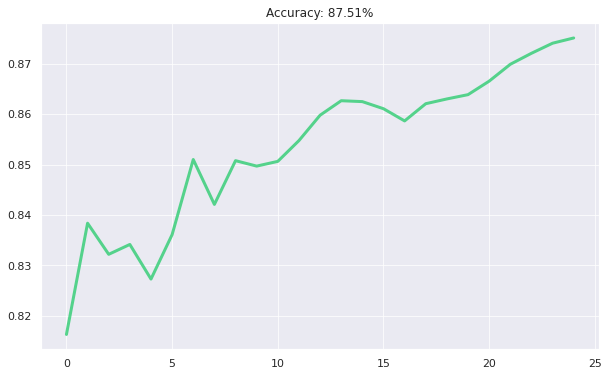

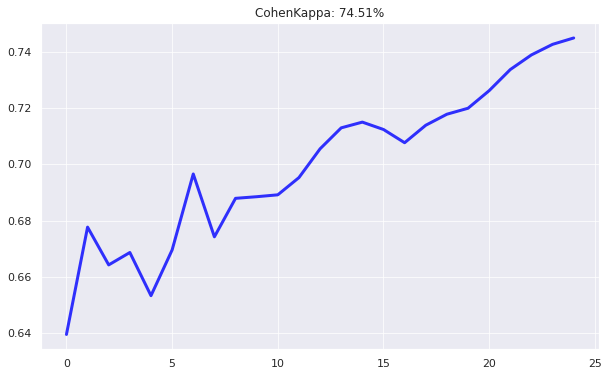

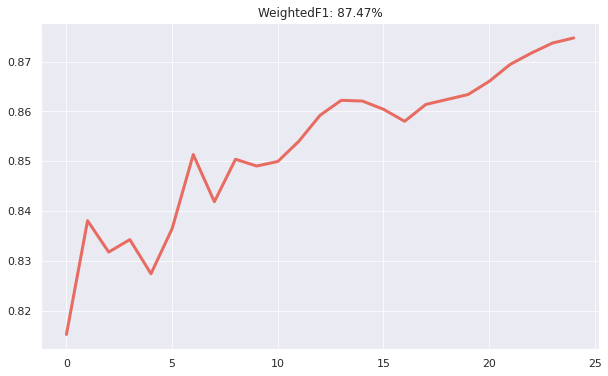

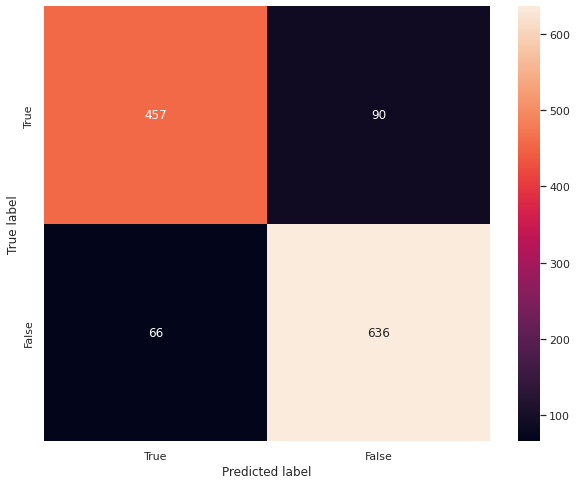

In [17]:
evaluate_binary_model(dataset, model, measure_every=50)